In [1]:
import numpy as np
import pandas as pd

path = r'model/'

df = pd.read_csv(path +"Train_ER_alpha.csv" , header = 0)
#df = pd.read_csv(path +"Train_ER_alpha.smi" ,sep= "\t")
#df = df.ix[:,0] # select first column
ID = df.chemblId
STATUS = df.STATUS
smiles = df.SMILES_desalt
smiles.to_csv('smiles/Train_smi_only.smi', header=False ,index=False)
len(smiles)

1238

In [2]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

mols = []

for i in df.SMILES_desalt:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data = pd.DataFrame(
    {'chemblId': ID,
     'STATUS' : STATUS,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })
data = data[['chemblId','STATUS','MW','LogP','nHAcc','nHDon']]

data.to_csv('SubFiles/ER_alpha_train_RO5.csv', sep=',' ,index=False)

In [3]:
len(data)

1238

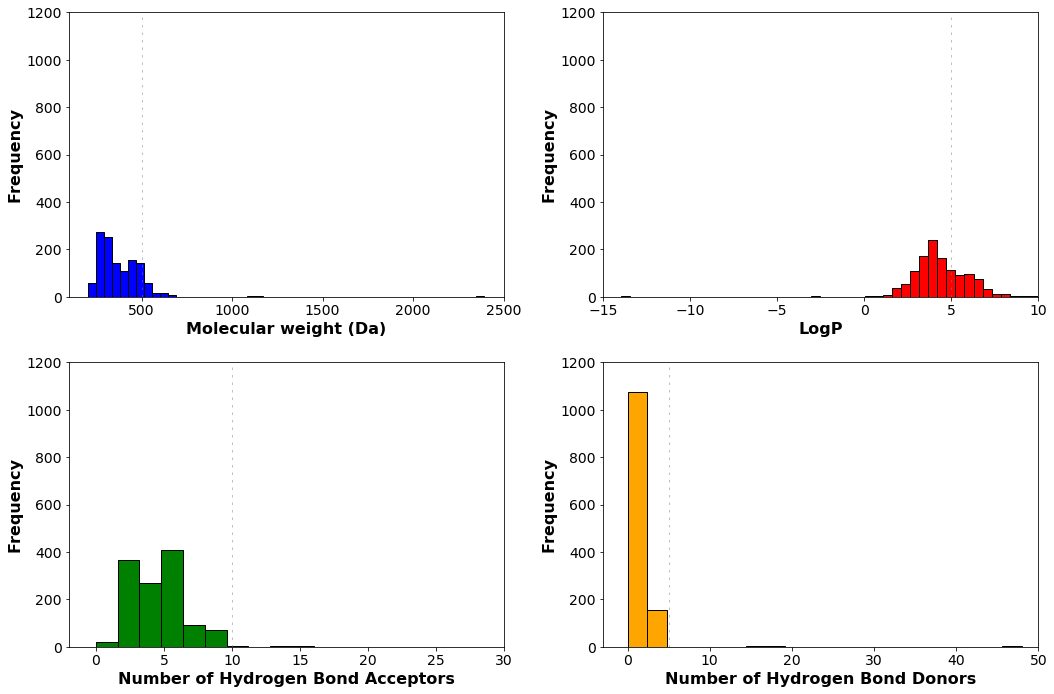

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

# Histogram for MW
hist, bins = np.histogram(MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(200,900)
plt1.set_ylim(0, 1200)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for LogP
hist, bins = np.histogram(LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(-15,10)
plt2.set_ylim(0,1200)
#plt2.grid(True)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
# Histogram for nHAcc
hist, bins = np.histogram(nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(-2,30)
plt3.set_ylim(0,1200)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for nHDon
hist, bins = np.histogram(nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(-3,50)
plt4.set_ylim(0,1200)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('Result/ER_Alpha-the histogram plots of the descriptors.pdf', dpi=300)

In [5]:
data.max()

chemblId       CHEMBL954
STATUS      intermediate
MW               2392.96
LogP             11.9912
nHAcc                 32
nHDon                 48
dtype: object

In [6]:
data.min()

chemblId    CHEMBL101382
STATUS            active
MW               206.329
LogP             -13.976
nHAcc                  0
nHDon                  0
dtype: object

In [7]:
df.head(2)

,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,...,organism,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt
0,7.69,NaN,0.33,0.50,3.31,CHEMBL370037,No,C16H12O3,252.26,0.0,...,Homo sapiens,CHEMBL370037,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,6.0,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21
1,8.15,NaN,4.06,4.12,3.86,CHEMBL189073,No,C17H11NO3,277.27,0.0,...,Homo sapiens,CHEMBL189073,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,1727.0,intermediate,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1


In [9]:
RO5 = pd.concat([data.set_index('chemblId'),df.set_index('chemblId')], axis=1, join='inner')
RO5.head(2)

,STATUS,MW,LogP,nHAcc,nHDon,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,...,organism,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt
chemblId,,,,,,,,,,,,,,,,,,,,,
CHEMBL370037,active,252.269,3.2248,3,2,7.69,NaN,0.33,0.50,3.31,...,Homo sapiens,CHEMBL370037,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,6.0,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21
CHEMBL189073,intermediate,277.279,4.0592,4,2,8.15,NaN,4.06,4.12,3.86,...,Homo sapiens,CHEMBL189073,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,1727.0,intermediate,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1


In [10]:
len(RO5),len(df)

(1238, 1238)

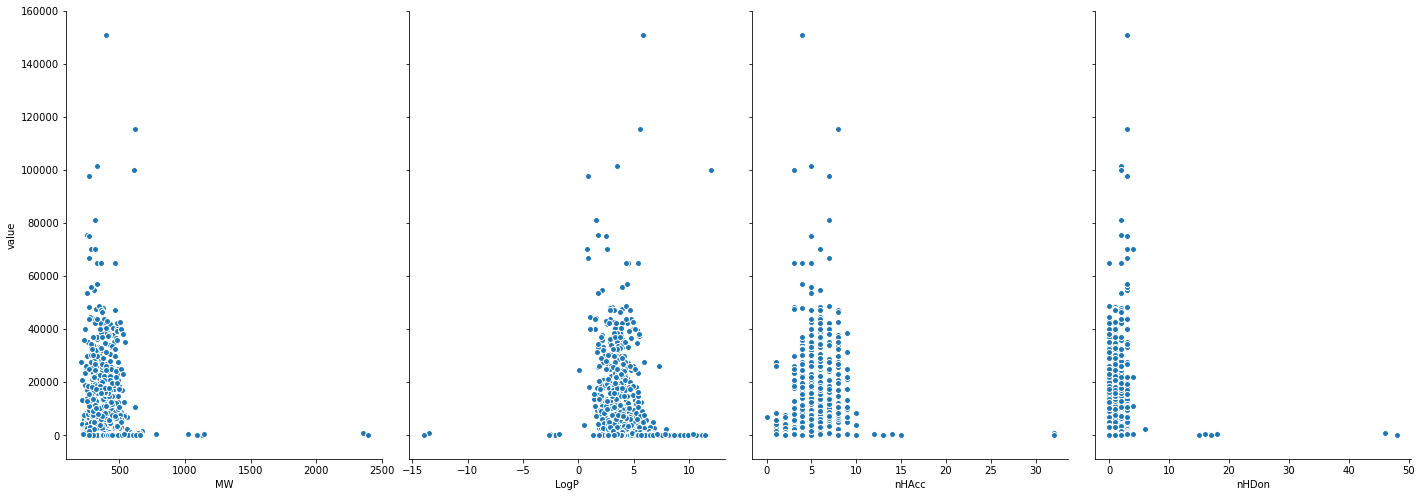

In [11]:
import seaborn as sns

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(RO5, x_vars=['MW','LogP','nHAcc','nHDon'], y_vars='value', size=7, aspect=0.7)

In [18]:
# Remove Outlier

RO5 =   RO5[RO5.MW.between(200, 1000, inclusive=True)  &
        RO5.LogP.between(-5, 12, inclusive=True)   &
        RO5.nHAcc.between(0, 20, inclusive=True) &
        RO5.nHDon.between(0, 20, inclusive=True)] # The inclusive (True: <=, False: <)

len(RO5)

1231

In [20]:
# Convert IC50 to pIC 50

from math import log10

def pIC50(df0):
    pIC50 = []

    for i in df0.value:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-log10(molar))
    #Y = pIC50

    df0['pIC50'] = pIC50
    df0 = df0.drop('value', 1)
        
    return df0

In [21]:
pIC50(RO5)
RO5.head(2)

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,STATUS,MW,LogP,nHAcc,nHDon,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,...,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt,pIC50
chemblId,,,,,,,,,,,,,,,,,,,,,
CHEMBL370037,active,252.269,3.2248,3,2,7.69,NaN,0.33,0.50,3.31,...,CHEMBL370037,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,6.0,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21,8.221849
CHEMBL189073,intermediate,277.279,4.0592,4,2,8.15,NaN,4.06,4.12,3.86,...,CHEMBL189073,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,1727.0,intermediate,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1,5.762708


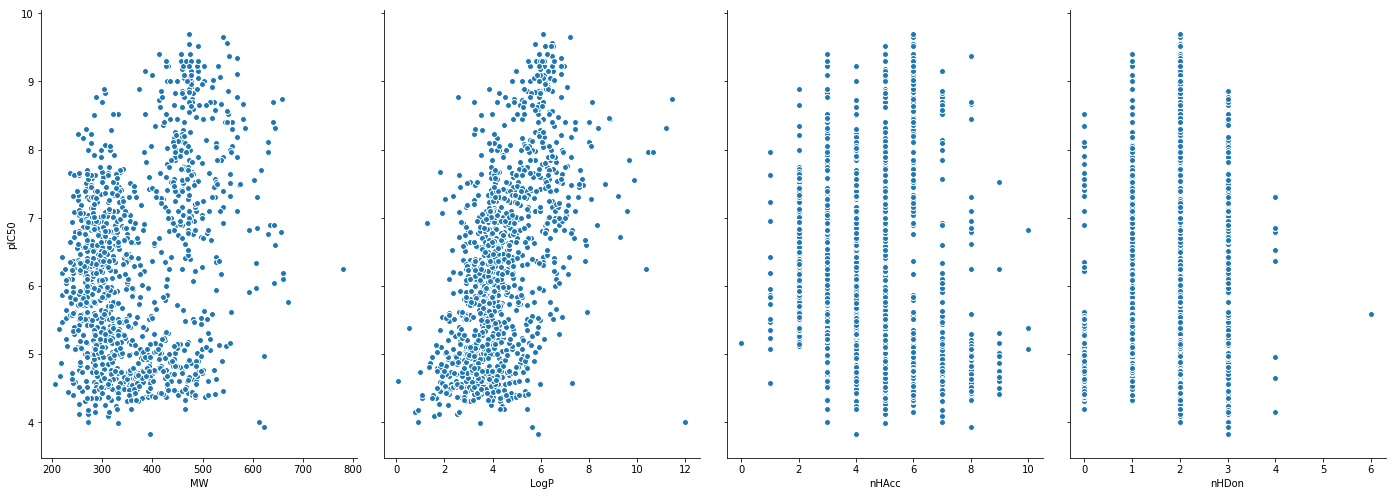

In [22]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(RO5, x_vars=['MW','LogP','nHAcc','nHDon'], y_vars='pIC50', size=7, aspect=0.7)

In [23]:
RO5['chemblId'] = RO5.index
ER_alpha_final = RO5[['SMILES_desalt','chemblId']]

ER_alpha_final.to_csv('smiles/ER_alpha_Train_final.smi', sep='\t' ,header=False ,index=False)

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
RO5.to_csv   ('model/ER_alpha_Train_final.csv'   , sep=',' ,index=False)

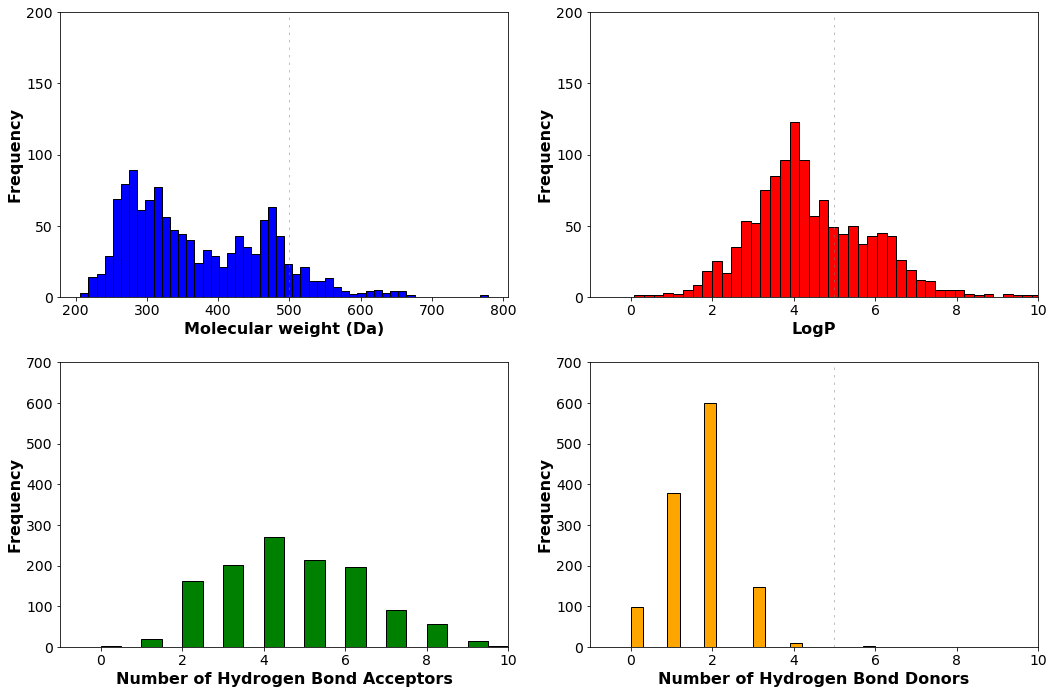

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals

# Histogram for MW
hist, bins = np.histogram(RO5.MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.yaxis.set_major_locator(loc)
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(200,900)
plt1.set_ylim(0, 200)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for LogP
hist, bins = np.histogram(RO5.LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.yaxis.set_major_locator(loc)
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(-1,10)
plt2.set_ylim(0,200)
#plt2.grid(True)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
# Histogram for nHAcc
hist, bins = np.histogram(RO5.nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
#plt3.yaxis.set_major_locator(loc)
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(-1,10)
plt3.set_ylim(0,700)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for nHDon
hist, bins = np.histogram(RO5.nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
#plt4.yaxis.set_major_locator(loc)
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(-1,10)
plt4.set_ylim(0,700)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('Result/ER_Alpha-the histogram plots of the descriptors select.pdf', dpi=300)

In [26]:
RO5.head(2)

,STATUS,MW,LogP,nHAcc,nHDon,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,...,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt,pIC50,chemblId
chemblId,,,,,,,,,,,,,,,,,,,,,
CHEMBL370037,active,252.269,3.2248,3,2,7.69,NaN,0.33,0.50,3.31,...,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,6.0,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21,8.221849,CHEMBL370037
CHEMBL189073,intermediate,277.279,4.0592,4,2,8.15,NaN,4.06,4.12,3.86,...,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,1727.0,intermediate,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1,5.762708,CHEMBL189073


In [27]:
RO5.numRo5Violations.value_counts()

0.0    817
1.0    313
2.0     98
3.0      1
Name: numRo5Violations, dtype: int64

In [28]:
df2 = RO5[np.isfinite(RO5['numRo5Violations'])]
len(df2)

1229

In [29]:
#check missing data

df1 = RO5[pd.isnull(RO5['numRo5Violations'])]
len(df1)

2

In [30]:
df1

,STATUS,MW,LogP,nHAcc,nHDon,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,...,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt,pIC50,chemblId
chemblId,,,,,,,,,,,,,,,,,,,,,
CHEMBL3235685,active,272.420,2.70060,2,2,NaN,NaN,NaN,NaN,NaN,...,"Bioorg. Med. Chem., (2014) 22:7:2244",CHEMBL206,9,Estrogen receptor alpha,nM,115.0,active,CC[Si](CC)(c1ccc(O)cc1)c1ccc(O)cc1,6.939302,CHEMBL3235685
CHEMBL3235686,active,328.528,4.09764,2,2,NaN,NaN,NaN,NaN,NaN,...,"Bioorg. Med. Chem., (2014) 22:7:2244",CHEMBL206,9,Estrogen receptor alpha,nM,26.2,active,CCC[Si](CCC)(c1ccc(O)c(C)c1)c1ccc(O)c(C)c1,7.581699,CHEMBL3235686


In [31]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

#path = r'/Users/zeromtmu/Desktop/Adjust_ER_alpha/smiles/'
#mols = SmilesMolSupplier(path +"Train_smi_only.smi")
#mols = SDMolSupplier("molecule.sdf")
mols = []

for i in df1.SMILES_desalt:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data2 = pd.DataFrame(
    {'chemblId': df1.chemblId,
     'STATUS' : 'active',
     'IC50' : df1.value,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })
data2 = data2[['chemblId','STATUS','IC50','MW','LogP','nHAcc','nHDon']]

In [32]:
data2

,chemblId,STATUS,IC50,MW,LogP,nHAcc,nHDon
chemblId,,,,,,,
CHEMBL3235685,CHEMBL3235685,active,115.0,272.420,2.70060,2,2
CHEMBL3235686,CHEMBL3235686,active,26.2,328.528,4.09764,2,2


In [34]:
data2       = pIC50(data2)
data2

,chemblId,STATUS,MW,LogP,nHAcc,nHDon,pIC50
chemblId,,,,,,,
CHEMBL3235685,CHEMBL3235685,active,272.420,2.70060,2,2,6.939302
CHEMBL3235686,CHEMBL3235686,active,328.528,4.09764,2,2,7.581699


In [35]:
# fillin missing data

data2['numRo5Violations'] = [0,0]

In [36]:
RO5.head(2)

,STATUS,MW,LogP,nHAcc,nHDon,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,...,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt,pIC50,chemblId
chemblId,,,,,,,,,,,,,,,,,,,,,
CHEMBL370037,active,252.269,3.2248,3,2,7.69,NaN,0.33,0.50,3.31,...,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,6.0,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21,8.221849,CHEMBL370037
CHEMBL189073,intermediate,277.279,4.0592,4,2,8.15,NaN,4.06,4.12,3.86,...,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,1727.0,intermediate,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1,5.762708,CHEMBL189073


In [37]:
RO5['numRo5Violations']=RO5['numRo5Violations'].fillna(0)
len(RO5[pd.isnull(RO5['numRo5Violations'])])

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

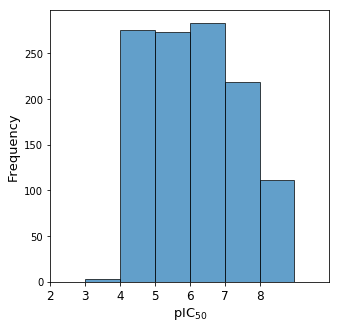

In [39]:
import matplotlib 

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
bins = range(10)

ax = RO5.plot(x='numRo5Violations', 
         y='pIC50', 
         kind='hist',
         alpha=0.7,
         figsize=(5,5),
         edgecolor='black', 
         legend=False,
         bins=bins)

bins_labels(bins, fontsize=12)

plt.rcParams["axes.labelweight"] = "bold"
ax.set_xlabel('pIC$_{50}$', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)

plt.xlim(xmin=2, xmax = 10)
plt.savefig('Result/RO5 pIC50 Violations.pdf', dpi=300, bbox_inches='tight')
plt.show()

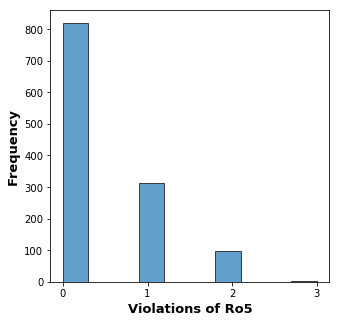

In [40]:
import matplotlib.pyplot as plt

ax = RO5.hist(column='numRo5Violations',
        grid=False, 
        alpha=0.7,
        figsize=(5,5),
        sharey=True, 
        sharex=True,
        edgecolor='black')

plt.title('')
plt.xlabel('Violations of Ro5', fontsize=13, weight='bold')
plt.ylabel('Frequency', fontsize=13, weight='bold')
plt.xticks(np.arange(min(RO5['numRo5Violations']), max(RO5['numRo5Violations'])+1, 1.0))
plt.savefig('Result/RO5 Violations.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
Ro5_0 = (RO5[RO5.numRo5Violations == 0])
Ro5_1 = (RO5[RO5.numRo5Violations == 1])
Ro5_2 = (RO5[RO5.numRo5Violations == 2])
Ro5_3 = (RO5[RO5.numRo5Violations == 3])

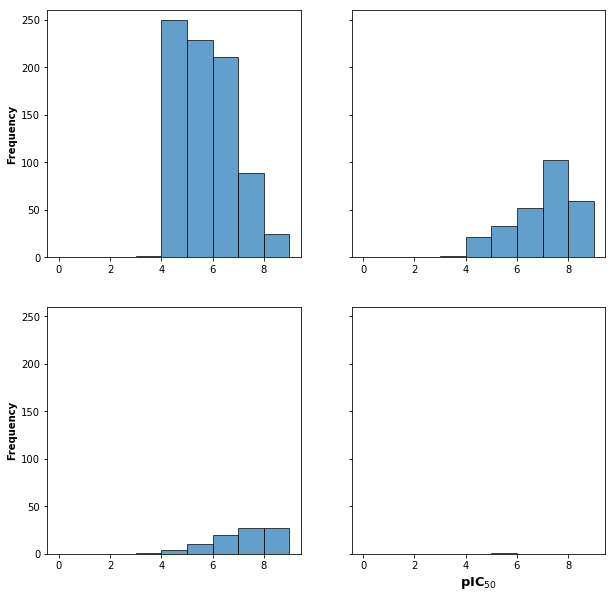

In [119]:
fig, axs = plt.subplots(2,2,figsize=(10,10), subplot_kw={'ylim': (0,260)}, sharey=True)

Ro5_0.plot(ax=axs[0, 0], x='numRo5Violations', 
         y='pIC50', 
         kind='hist',
         alpha=0.7,
         edgecolor='black', 
         legend=False,
         bins=bins)
Ro5_1.plot(ax=axs[0, 1], x='numRo5Violations', 
         y='pIC50', 
         kind='hist',
         alpha=0.7,
         edgecolor='black', 
         legend=False,
         bins=bins)
Ro5_2.plot(ax=axs[1, 0], x='numRo5Violations', 
         y='pIC50', 
         kind='hist',
         alpha=0.7b
         edgecolor='black', 
         legend=False,
         bins=bins, label='ylabel')
Ro5_3.plot(ax=axs[1, 1], x='numRo5Violations', 
         y='pIC50', 
         kind='hist',
         alpha=0.7,
         edgecolor='black', 
         legend=False,
         bins=bins)

plt.xlabel('pIC$_{50}$', fontsize=13, ha='center')
plt.ylabel('Frequency', fontsize=13)


        
plt.savefig('Result/RO5 pIC50 Violations.pdf', dpi=300, bbox_inches='tight')
fig.show()

In [42]:
MW_0_100=   (RO5[(0   < RO5.MW) & (RO5.MW <= 100 )])
MW_100_200= (RO5[(100 < RO5.MW) & (RO5.MW <= 200 )])
MW_200_300= (RO5[(200 < RO5.MW) & (RO5.MW <= 300 )])
MW_300_400= (RO5[(300 < RO5.MW) & (RO5.MW <= 400 )])
MW_400_500= (RO5[(400 < RO5.MW) & (RO5.MW <= 500 )])
MW_500_600= (RO5[(500 < RO5.MW) & (RO5.MW <= 600 )])
MW_600_700= (RO5[(600 < RO5.MW) & (RO5.MW <= 700 )])
MW_700_800= (RO5[(700 < RO5.MW) & (RO5.MW <= 800 )])
MW_800_900= (RO5[(800 < RO5.MW) & (RO5.MW <= 900 )])
MW_900_1000=(RO5[(900 < RO5.MW) & (RO5.MW <= 1000)])

mean0_100 =   (RO5[(0   < RO5.MW) & (RO5.MW <= 100 )]['pIC50'].mean())
mean100_200 = (RO5[(100 < RO5.MW) & (RO5.MW <= 200 )]['pIC50'].mean())
mean200_300 = (RO5[(200 < RO5.MW) & (RO5.MW <= 300 )]['pIC50'].mean())
mean300_400 = (RO5[(300 < RO5.MW) & (RO5.MW <= 400 )]['pIC50'].mean())
mean400_500 = (RO5[(400 < RO5.MW) & (RO5.MW <= 500 )]['pIC50'].mean())
mean500_600 = (RO5[(500 < RO5.MW) & (RO5.MW <= 600 )]['pIC50'].mean())
mean600_700 = (RO5[(600 < RO5.MW) & (RO5.MW <= 700 )]['pIC50'].mean())
mean700_800 = (RO5[(700 < RO5.MW) & (RO5.MW <= 800 )]['pIC50'].mean())
mean800_900 = (RO5[(800 < RO5.MW) & (RO5.MW <= 900 )]['pIC50'].mean())
mean900_1000= (RO5[(900 < RO5.MW) & (RO5.MW <= 1000)]['pIC50'].mean())

std0_100   = (RO5[(0   < RO5.MW) & (RO5.MW <= 100)]['pIC50'].std())
std100_200 = (RO5[(100 < RO5.MW) & (RO5.MW <= 200)]['pIC50'].std())
std200_300 = (RO5[(200 < RO5.MW) & (RO5.MW <= 300)]['pIC50'].std())
std300_400 = (RO5[(300 < RO5.MW) & (RO5.MW <= 400)]['pIC50'].std())
std400_500 = (RO5[(400 < RO5.MW) & (RO5.MW <= 500)]['pIC50'].std())
std500_600 = (RO5[(500 < RO5.MW) & (RO5.MW <= 600)]['pIC50'].std())
std600_700 = (RO5[(600 < RO5.MW) & (RO5.MW <= 700)]['pIC50'].std())
std700_800 = (RO5[(700 < RO5.MW) & (RO5.MW <= 800)]['pIC50'].std())
std800_900 = (RO5[(800 < RO5.MW) & (RO5.MW <= 900)]['pIC50'].std())
std900_1000 =(RO5[(900 < RO5.MW) & (RO5.MW <= 1000)]['pIC50'].std())


outfile = open('binning.csv', 'a')

print >> outfile, 'MW'
print >> outfile, 'n 0-100,   mean 0-100  , std 0-100,'   + \
                  'n 100-200, mean 100-200, std 100-200,' + \
                  'n 200-300, mean 200-300, std 200-300,' + \
                  'n 300-400, mean 300-400, std 300-400,' + \
                  'n 400-500, mean 400-500, std 400-500,' + \
                  'n 500-600, mean 500-600, std 500-600,' + \
                  'n 600-700, mean 600-700, std 600-700,' + \
                  'n 700-800, mean 700-800, std 700-800,' + \
                  'n 800-900, mean 800-900, std 800-900,' + \
                  'n 900-1000,mean 900-1000,std 900-1000'
                    
print >> outfile, '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(MW_0_100), mean0_100, std0_100,
                                        len(MW_100_200), mean100_200, std100_200,
                                        len(MW_200_300), mean200_300, std200_300,
                                        len(MW_300_400), mean300_400, std300_400,
                                        len(MW_400_500), mean400_500, std400_500,
                                        len(MW_500_600), mean500_600, std500_600,
                                        len(MW_600_700), mean600_700, std600_700,
                                        len(MW_700_800), mean700_800, std700_800,
                                        len(MW_800_900), mean800_900, std800_900,
                                        len(MW_900_1000), mean900_1000, std900_1000)
                                        
outfile.close()  

In [43]:
LogP_0_1= (RO5[(0 < RO5.LogP) & (RO5.LogP <= 1 )])
LogP_1_2= (RO5[(1 < RO5.LogP) & (RO5.LogP <= 2 )])
LogP_2_3= (RO5[(2 < RO5.LogP) & (RO5.LogP <= 3 )])
LogP_3_4= (RO5[(3 < RO5.LogP) & (RO5.LogP <= 4 )])
LogP_4_5= (RO5[(4 < RO5.LogP) & (RO5.LogP <= 5 )])
LogP_5_6= (RO5[(5 < RO5.LogP) & (RO5.LogP <= 6 )])
LogP_6_7= (RO5[(6 < RO5.LogP) & (RO5.LogP <= 7 )])
LogP_7_8= (RO5[(7 < RO5.LogP) & (RO5.LogP <= 8 )])
LogP_8_9= (RO5[(8 < RO5.LogP) & (RO5.LogP <= 9 )])
LogP_9_10=(RO5[(9 < RO5.LogP) & (RO5.LogP <= 10)])

mean0_1 = (RO5[(0 < RO5.LogP) & (RO5.LogP <= 1 )]['pIC50'].mean())
mean1_2 = (RO5[(1 < RO5.LogP) & (RO5.LogP <= 2 )]['pIC50'].mean())
mean2_3 = (RO5[(2 < RO5.LogP) & (RO5.LogP <= 3 )]['pIC50'].mean())
mean3_4 = (RO5[(3 < RO5.LogP) & (RO5.LogP <= 4 )]['pIC50'].mean())
mean4_5 = (RO5[(4 < RO5.LogP) & (RO5.LogP <= 5 )]['pIC50'].mean())
mean5_6 = (RO5[(5 < RO5.LogP) & (RO5.LogP <= 6 )]['pIC50'].mean())
mean6_7 = (RO5[(6 < RO5.LogP) & (RO5.LogP <= 7 )]['pIC50'].mean())
mean7_8 = (RO5[(7 < RO5.LogP) & (RO5.LogP <= 8 )]['pIC50'].mean())
mean8_9 = (RO5[(8 < RO5.LogP) & (RO5.LogP <= 9 )]['pIC50'].mean())
mean9_10= (RO5[(9 < RO5.LogP) & (RO5.LogP <= 10)]['pIC50'].mean())

std0_1 = (RO5[(0 < RO5.LogP) & (RO5.LogP <= 1)]['pIC50'].std())
std1_2 = (RO5[(1 < RO5.LogP) & (RO5.LogP <= 2)]['pIC50'].std())
std2_3 = (RO5[(2 < RO5.LogP) & (RO5.LogP <= 3)]['pIC50'].std())
std3_4 = (RO5[(3 < RO5.LogP) & (RO5.LogP <= 4)]['pIC50'].std())
std4_5 = (RO5[(4 < RO5.LogP) & (RO5.LogP <= 5)]['pIC50'].std())
std5_6 = (RO5[(5 < RO5.LogP) & (RO5.LogP <= 6)]['pIC50'].std())
std6_7 = (RO5[(6 < RO5.LogP) & (RO5.LogP <= 7)]['pIC50'].std())
std7_8 = (RO5[(7 < RO5.LogP) & (RO5.LogP <= 8)]['pIC50'].std())
std8_9 = (RO5[(8 < RO5.LogP) & (RO5.LogP <= 9)]['pIC50'].std())
std9_10 = (RO5[(9 < RO5.LogP) & (RO5.LogP <= 10)]['pIC50'].std())


outfile = open('binning.csv', 'a')

print >> outfile, 'LogP'
print >> outfile, 'n 0-1, mean 0-1, std 0-1,'   + \
                  'n 1-2, mean 1-2, std 1-2,' + \
                  'n 2-3, mean 2-3, std 2-3,' + \
                  'n 3-4, mean 3-4, std 3-4,' + \
                  'n 4-5, mean 4-5, std 4-5,' + \
                  'n 5-6, mean 5-6, std 5-6,' + \
                  'n 6-7, mean 6-7, std 6-7,' + \
                  'n 7-8, mean 7-8, std 7-8,' + \
                  'n 8-9, mean 8-9, std 8-9,' + \
                  'n 9-10, mean 9-10, std 9-10'
                    
print >> outfile, '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(LogP_0_1), mean0_1, std0_1,
                                        len(LogP_1_2), mean1_2, std1_2,
                                        len(LogP_2_3), mean2_3, std2_3,
                                        len(LogP_3_4), mean3_4, std3_4,
                                        len(LogP_4_5), mean4_5, std4_5,
                                        len(LogP_5_6), mean5_6, std5_6,
                                        len(LogP_6_7), mean6_7, std6_7,
                                        len(LogP_7_8), mean7_8, std7_8,
                                        len(LogP_8_9), mean8_9, std8_9,
                                        len(LogP_9_10),mean9_10, std9_10)
                                        
outfile.close() 

In [44]:
nHAcc_1 = (RO5[RO5.nHAcc== 1 ])
nHAcc_2 = (RO5[RO5.nHAcc== 2 ])
nHAcc_3 = (RO5[RO5.nHAcc== 3 ])
nHAcc_4 = (RO5[RO5.nHAcc== 4 ])
nHAcc_5 = (RO5[RO5.nHAcc== 5 ])
nHAcc_6 = (RO5[RO5.nHAcc== 6 ])
nHAcc_7 = (RO5[RO5.nHAcc== 7 ])
nHAcc_8 = (RO5[RO5.nHAcc== 8 ])
nHAcc_9 = (RO5[RO5.nHAcc== 9 ])
nHAcc_10= (RO5[RO5.nHAcc== 10])

mean_1 = (RO5[RO5.nHAcc== 1 ]['pIC50'].mean())
mean_2 = (RO5[RO5.nHAcc== 2 ]['pIC50'].mean())
mean_3 = (RO5[RO5.nHAcc== 3 ]['pIC50'].mean())
mean_4 = (RO5[RO5.nHAcc== 4 ]['pIC50'].mean())
mean_5 = (RO5[RO5.nHAcc== 5 ]['pIC50'].mean())
mean_6 = (RO5[RO5.nHAcc== 6 ]['pIC50'].mean())
mean_7 = (RO5[RO5.nHAcc== 7 ]['pIC50'].mean())
mean_8 = (RO5[RO5.nHAcc== 8 ]['pIC50'].mean())
mean_9 = (RO5[RO5.nHAcc== 9 ]['pIC50'].mean())
mean_10= (RO5[RO5.nHAcc== 10]['pIC50'].mean())

std_1 = (RO5[RO5.nHAcc== 1 ]['pIC50'].std())
std_2 = (RO5[RO5.nHAcc== 2 ]['pIC50'].std())
std_3 = (RO5[RO5.nHAcc== 3 ]['pIC50'].std())
std_4 = (RO5[RO5.nHAcc== 4 ]['pIC50'].std())
std_5 = (RO5[RO5.nHAcc== 5 ]['pIC50'].std())
std_6 = (RO5[RO5.nHAcc== 6 ]['pIC50'].std())
std_7 = (RO5[RO5.nHAcc== 7 ]['pIC50'].std())
std_8 = (RO5[RO5.nHAcc== 8 ]['pIC50'].std())
std_9 = (RO5[RO5.nHAcc== 9 ]['pIC50'].std())
std_10 =(RO5[RO5.nHAcc== 10]['pIC50'].std())


outfile = open('binning.csv', 'a')

print >> outfile, 'nHAcc'
print >> outfile, 'n 1, mean 1, std 1,'   + \
                  'n 2, mean 2, std 2,' + \
                  'n 3, mean 3, std 3,' + \
                  'n 4, mean 4, std 4,' + \
                  'n 5, mean 5, std 5,' + \
                  'n 6, mean 6, std 6,' + \
                  'n 7, mean 7, std 7,' + \
                  'n 8, mean 8, std 8,' + \
                  'n 9, mean 9, std 9,' + \
                  'n 10,mean 10,std 10'
                    
print >> outfile, '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(nHAcc_1), mean_1, std_1,
                                        len(nHAcc_2), mean_2, std_2,
                                        len(nHAcc_3), mean_3, std_3,
                                        len(nHAcc_4), mean_4, std_4,
                                        len(nHAcc_5), mean_5, std_5,
                                        len(nHAcc_6), mean_6, std_6,
                                        len(nHAcc_7), mean_7, std_7,
                                        len(nHAcc_8), mean_8, std_8,
                                        len(nHAcc_9), mean_9, std_9,
                                        len(nHAcc_10),mean_10,std_10)
                                        
outfile.close()

In [45]:
nHDon_1 = (RO5[RO5.nHDon== 1 ])
nHDon_2 = (RO5[RO5.nHDon== 2 ])
nHDon_3 = (RO5[RO5.nHDon== 3 ])
nHDon_4 = (RO5[RO5.nHDon== 4 ])
nHDon_5 = (RO5[RO5.nHDon== 5 ])
nHDon_6 = (RO5[RO5.nHDon== 6 ])
nHDon_7 = (RO5[RO5.nHDon== 7 ])
nHDon_8 = (RO5[RO5.nHDon== 8 ])
nHDon_9 = (RO5[RO5.nHDon== 9 ])
nHDon_10= (RO5[RO5.nHDon== 10])

mean_1_D = (RO5[RO5.nHDon== 1 ]['pIC50'].mean())
mean_2_D = (RO5[RO5.nHDon== 2 ]['pIC50'].mean())
mean_3_D = (RO5[RO5.nHDon== 3 ]['pIC50'].mean())
mean_4_D = (RO5[RO5.nHDon== 4 ]['pIC50'].mean())
mean_5_D = (RO5[RO5.nHDon== 5 ]['pIC50'].mean())
mean_6_D = (RO5[RO5.nHDon== 6 ]['pIC50'].mean())
mean_7_D = (RO5[RO5.nHDon== 7 ]['pIC50'].mean())
mean_8_D = (RO5[RO5.nHDon== 8 ]['pIC50'].mean())
mean_9_D = (RO5[RO5.nHDon== 9 ]['pIC50'].mean())
mean_10_D= (RO5[RO5.nHDon== 10]['pIC50'].mean())

std_1_D = (RO5[RO5.nHDon== 1 ]['pIC50'].std())
std_2_D = (RO5[RO5.nHDon== 2 ]['pIC50'].std())
std_3_D = (RO5[RO5.nHDon== 3 ]['pIC50'].std())
std_4_D = (RO5[RO5.nHDon== 4 ]['pIC50'].std())
std_5_D = (RO5[RO5.nHDon== 5 ]['pIC50'].std())
std_6_D = (RO5[RO5.nHDon== 6 ]['pIC50'].std())
std_7_D = (RO5[RO5.nHDon== 7 ]['pIC50'].std())
std_8_D = (RO5[RO5.nHDon== 8 ]['pIC50'].std())
std_9_D = (RO5[RO5.nHDon== 9 ]['pIC50'].std())
std_10_D =(RO5[RO5.nHDon== 10]['pIC50'].std())

outfile = open('binning.csv', 'a')

print >> outfile, 'nHDon'
print >> outfile, 'n 1, mean 1, std 1,'   + \
                  'n 2, mean 2, std 2,' + \
                  'n 3, mean 3, std 3,' + \
                  'n 4, mean 4, std 4,' + \
                  'n 5, mean 5, std 5,' + \
                  'n 6, mean 6, std 6,' + \
                  'n 7, mean 7, std 7,' + \
                  'n 8, mean 8, std 8,' + \
                  'n 9, mean 9, std 9,' + \
                  'n 10,mean 10,std 10'
                    
print >> outfile, '%d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f, \
                    %d,%0.4f,%0.4f,%d,%0.4f,%0.4f,%d,%0.4f,%0.4f' \
                                     % (len(nHDon_1), mean_1_D, std_1_D,
                                        len(nHDon_2), mean_2_D, std_2_D,
                                        len(nHDon_3), mean_3_D, std_3_D,
                                        len(nHDon_4), mean_4_D, std_4_D,
                                        len(nHDon_5), mean_5_D, std_5_D,
                                        len(nHDon_6), mean_6_D, std_6_D,
                                        len(nHDon_7), mean_7_D, std_7_D,
                                        len(nHDon_8), mean_8_D, std_8_D,
                                        len(nHDon_9), mean_9_D, std_9_D,
                                        len(nHDon_10),mean_10_D,std_10_D)
                                        
outfile.close()

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


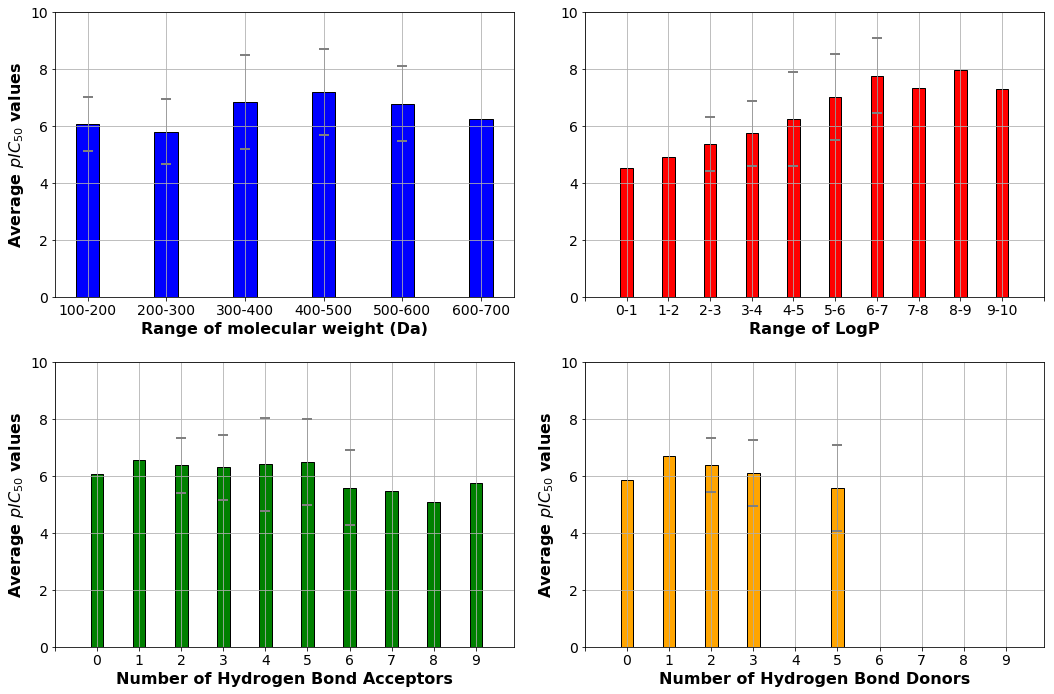

In [46]:
import matplotlib.ticker as plticker

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals

# Histogram for MW
mean1 = ((mean0_100),(mean100_200),(mean200_300),(mean300_400),(mean400_500), \
      (mean500_600),(mean600_700),(mean700_800),(mean800_900),(mean900_1000))
std1 = ((std0_100),(std100_200),(std200_300),(std300_400),(std400_500), \
      (std500_600),(std600_700),(std700_800),(std800_900),(std900_1000))
index = np.arange(len(mean1))  # the x locations for the groups


plt1.bar(index, mean1, align='center', width=width, color='blue',edgecolor='black', yerr=std1,\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))

labels1 = ('0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000')
plt1.set_xticklabels(labels1, fontdict=None, minor=False)
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(0,10)
plt1.set_ylim(0,10)
plt1.set_xlabel('Range of molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Average $pIC_{50}$ values', fontsize=16, fontweight='bold')
plt1.grid(True)


# Histogram for LogP
mean2 = ((mean0_1),(mean1_2),(mean2_3),(mean3_4),(mean4_5), \
      (mean5_6),(mean6_7),(mean7_8),(mean8_9),(mean9_10))
std2 = ((std0_1),(std1_2),(std2_3),(std3_4),(std4_5), \
      (std5_6),(std6_7),(std7_8),(std8_9),(std9_10))
index = np.arange(len(mean2))  # the x locations for the groups

plt2.bar(index, mean2, align='center', width=width, color='red',edgecolor='black', yerr=std1,\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))

labels2 = ('','','0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10')
plt2.xaxis.set_major_locator(loc)

plt2.set_xticklabels(labels2, minor=False)
plt2.set_xlim(-1,10)
plt2.set_ylim(0,10)
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlabel('Range of LogP', fontsize=16, fontweight='bold')
#plt2.set_ylabel('Average $pIC_{50}$ values', fontsize=16, fontweight='bold')
plt2.grid(True)


# Histogram for nHAcc
mean3 = ((mean_1),(mean_2),(mean_3),(mean_4),(mean_5),(mean_6),(mean_7),(mean_8),(mean_9),(mean_10))
std3 = ((std_1),(std_2),(std_3),(std_4),(std_5),(std_6),(std_7),(std_8),(std_9),(std_10))
index = np.arange(len(mean3))  # the x locations for the groups

plt3.bar(index, mean3, align='center', width=width, color='green',edgecolor='black', yerr=std1,\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))

labels = ('','','0','1','2','3','4','5','6','7','8','9','10')
plt3.xaxis.set_major_locator(loc)
plt3.set_xlim(-1,9.9)
plt3.set_ylim(0,10)
plt3.set_xticklabels(labels, fontdict=None, minor=False)
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Average $pIC_{50}$ values', fontsize=16, fontweight='bold')
plt3.grid(True)


# Histogram for nHDon
mean4 = ((mean_1_D),(mean_2_D),(mean_3_D),(mean_4_D),(mean_5_D),(mean_6_D),(mean_7_D),(mean_8_D),(mean_9_D),(mean_10_D))
std4 = ((std_1_D),(std_2_D),(std_3_D),(std_4_D),(std_5_D),(std_6_D),(std_7_D),(std_8_D),(std_9_D),(std_10_D))
index = np.arange(len(mean4))  # the x locations for the groups

plt4.bar(index, mean4, align='center', width=width, color='orange',edgecolor='black', yerr=std1,\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))

labels = ('','','0','1','2','3','4','5','6','7','8','9','10')
plt4.xaxis.set_major_locator(loc)

plt4.set_xlim(-1,9.9)
plt4.set_ylim(0,10)
plt4.set_xticklabels(labels, fontdict=None, minor=False)
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Average $pIC_{50}$ values', fontsize=16, fontweight='bold')
plt4.grid(True)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('Result/ER_Alpha-Average pIC50 plots of the descriptors by range.pdf', dpi=300)